### Courtesy of: 
https://www.youtube.com/watch?v=QIUxPv5PJOY

https://medium.com/@randerson112358/stock-price-prediction-using-python-machine-learning-e82a039ac2bb


In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
print('Imports done')

plt.style.use('fivethirtyeight')


Imports done


In [102]:
# Variables
stock = 'AAPL'
samples_len = 60
test_data_ratio = 0.8
predict_len = 3

In [3]:
# Get stock price data
price_data = web.DataReader(stock, data_source='yahoo', start='2012-01-01', end='2019-12-17')

# show data
price_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.228699
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.400017
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.316193


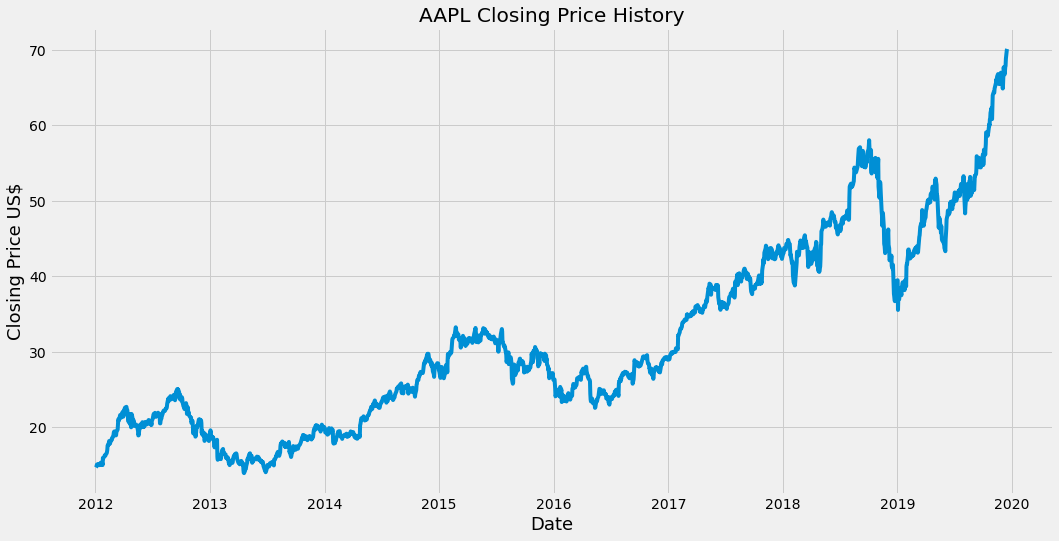

In [4]:
# Chart closing price
plt.figure(figsize=(16, 8))
plt.title(stock + ' Closing Price History')
plt.plot(price_data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price US$', fontsize=18)
plt.show()

In [60]:
# close_prices = price_data.filter(['Close']).values
close_prices_df = price_data.filter(['Close'])
print(close_prices_df)
close_prices = close_prices_df.values
print(close_prices)
# dataset = data.values   # convert to numpy array

training_data_len = math.ceil(len(close_prices) * test_data_ratio)

training_data_len

                Close
Date                 
2012-01-03  14.686786
2012-01-04  14.765715
2012-01-05  14.929643
2012-01-06  15.085714
2012-01-09  15.061786
...               ...
2019-12-11  67.692497
2019-12-12  67.864998
2019-12-13  68.787498
2019-12-16  69.964996
2019-12-17  70.102501

[2003 rows x 1 columns]
[[14.6867857 ]
 [14.76571465]
 [14.92964268]
 ...
 [68.78749847]
 [69.96499634]
 [70.10250092]]


1603

In [6]:
# TODO: scaling should be done separately on training and test data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_prices)
scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [28]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

# Take 60 data points and then expected result is the next value
for i in range(samples_len, len(train_data)):
    x_train.append(train_data[i-samples_len : i, 0])
    y_train.append(train_data[i, 0])

    # if i == samples_len:
    #     print(x_train)
    #     print(y_train)
    #     print()

    # if i == samples_len+1:
    #     print(x_train)
    #     print(y_train)
    #     print()


9993765, 0.18101681,
        0.18328732, 0.1902769 , 0.19664321, 0.18520166, 0.19468433,
        0.18404414, 0.18195175, 0.18253049, 0.18034904, 0.20314307,
        0.1943282 , 0.19677676, 0.16752737, 0.17051017, 0.18497905,
        0.18092778, 0.17224647, 0.18057162, 0.18168461, 0.17019854,
        0.174606  , 0.17451695, 0.17131153, 0.16877391, 0.17006498]),
 array([0.27379574, 0.28042916, 0.2827442 , 0.27584364, 0.28087435,
        0.27709018, 0.27611075, 0.27829223, 0.27401832, 0.26929925,
        0.26449112, 0.28154215, 0.27820317, 0.2779806 , 0.26636097,
        0.26880953, 0.25549817, 0.25238181, 0.24352238, 0.24730654,
        0.23679994, 0.22366662, 0.22945419, 0.229009  , 0.2351527 ,
        0.23257055, 0.22718368, 0.23573144, 0.22940966, 0.22023863,
        0.22063929, 0.20888611, 0.19993765, 0.18101681, 0.18328732,
        0.1902769 , 0.19664321, 0.18520166, 0.19468433, 0.18404414,
        0.18195175, 0.18253049, 0.18034904, 0.20314307, 0.1943282 ,
        0.19677676, 0.167

In [8]:
# Reshape data
x_train, y_train = np.array(x_train), np.array(y_train)

print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # needs to have 3 dimensions
x_train.shape

(1543, 60)


(1543, 60, 1)

In [9]:
# Create LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [10]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1543/1543 [==============================] - 54s 35ms/step - loss: 7.5412e-04
Epoch 2/5
1543/1543 [==============================] - 70s 45ms/step - loss: 2.9305e-04
Epoch 3/5
1543/1543 [==============================] - 64s 42ms/step - loss: 2.6652e-04
Epoch 4/5
1543/1543 [==============================] - 65s 42ms/step - loss: 2.0448e-04
Epoch 5/5
1543/1543 [==============================] - 63s 41ms/step - loss: 1.6510e-04


&lt;tensorflow.python.keras.callbacks.History at 0x1dd69d81e80&gt;

In [12]:
# Testing data set
test_data = scaled_data[training_data_len - samples_len :, :]
x_test = []
y_test = close_prices[training_data_len:, :] # predicting this

print(scaled_data.shape)
print(test_data.shape)

for i in range(samples_len, len(test_data)):
    x_test.append(test_data[i - samples_len : i, 0])

# x_test



(2003, 1)
(460, 1)


In [13]:
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # need 3 dimensions

In [14]:
# Predict on test dataset
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # scale back to real values


In [15]:
# Evaluate using Root Mean Square Error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

1.5360052577706453

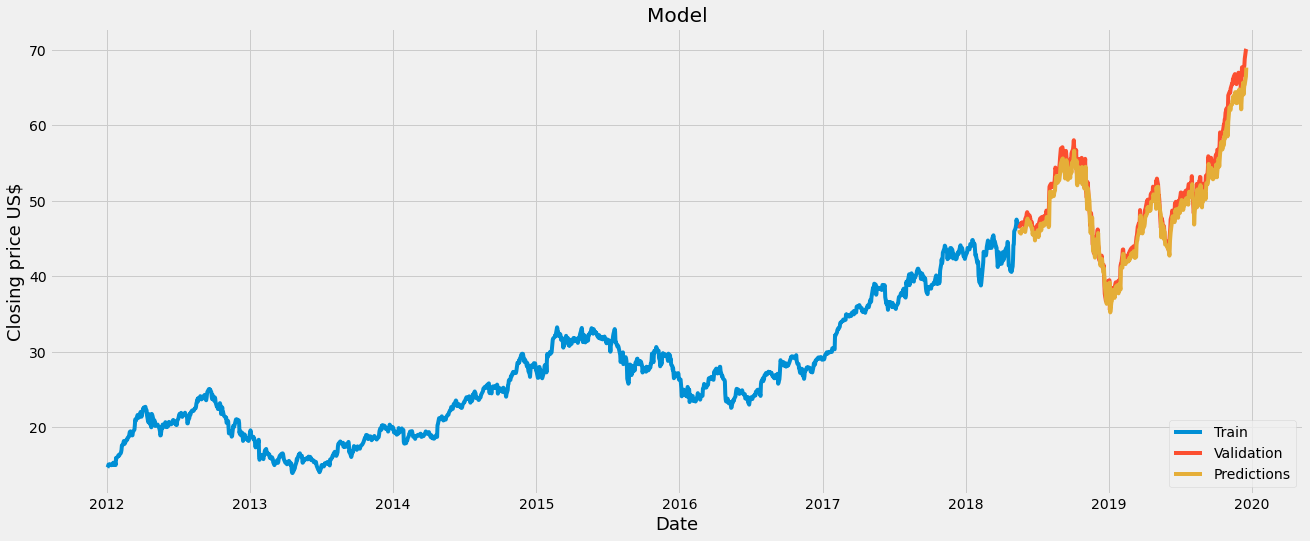

In [99]:
# Plot
train = price_data[: training_data_len]
valid = price_data[training_data_len :]
valid['Predictions'] = predictions

plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price US$', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

# valid

In [18]:
# Show validation and predicted prices
valid

,High,Low,Open,Close,Volume,Adj Close,Predictions
Date,,,,,,,
2018-05-17,47.227501,46.590000,47.000000,46.747501,69176000.0,45.421623,46.127995
2018-05-18,46.952499,46.532501,46.797501,46.577499,73190800.0,45.256443,45.819920
2018-05-21,47.317501,46.727501,47.000000,46.907501,73603200.0,45.577084,45.655342
2018-05-22,47.220001,46.695000,47.095001,46.790001,60962800.0,45.462914,46.038635
2018-05-23,47.125000,46.439999,46.587502,47.090000,80233600.0,45.754414,45.920387
...,...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.228699,64.715385
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.400017,65.326271
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.316193,65.379562


In [64]:
last_60_days = close_prices_df[-samples_len + i :]
# print(last_60_days)

new = pd.DataFrame([{1.1}], index=['2020-01-01'], columns=['Close'])
last_60_days = pd.concat([last_60_days, new])
print(last_60_days)

                         Close
2019-09-26 00:00:00  54.972500
2019-09-27 00:00:00  54.705002
2019-09-30 00:00:00  55.992500
2019-10-01 00:00:00  56.147499
2019-10-02 00:00:00  54.740002
2019-10-03 00:00:00  55.205002
2019-10-04 00:00:00  56.752499
2019-10-07 00:00:00  56.764999
2019-10-08 00:00:00  56.099998
2019-10-09 00:00:00  56.757500
2019-10-10 00:00:00  57.522499
2019-10-11 00:00:00  59.052502
2019-10-14 00:00:00  58.967499
2019-10-15 00:00:00  58.830002
2019-10-16 00:00:00  58.592499
2019-10-17 00:00:00  58.820000
2019-10-18 00:00:00  59.102501
2019-10-21 00:00:00  60.127499
2019-10-22 00:00:00  59.990002
2019-10-23 00:00:00  60.794998
2019-10-24 00:00:00  60.895000
2019-10-25 00:00:00  61.645000
2019-10-28 00:00:00  62.262501
2019-10-29 00:00:00  60.822498
2019-10-30 00:00:00  60.814999
2019-10-31 00:00:00  62.189999
2019-11-01 00:00:00  63.955002
2019-11-04 00:00:00  64.375000
2019-11-05 00:00:00  64.282501
2019-11-06 00:00:00  64.309998
2019-11-07 00:00:00  64.857498
2019-11-

In [108]:

last_60_days = close_prices[-samples_len :]

# Need to figure out how to do this better

for i in range(predict_len):
    # print('i=')
    # print(i)
    # print(last_60_days.shape)
    last_60_days_scaled = scaler.transform(last_60_days)

    # Transform ready to run prediction
    X_test = []
    X_test.append(last_60_days_scaled)
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # using last 60 days of data predict the next value
    pred_price = model.predict(X_test)

    # Return back to dollars
    pred_price = scaler.inverse_transform(pred_price)
    # print(pred_price)

    # Add to last 60 days (vertically: axis=0)
    last_60_days = np.append(last_60_days, pred_price, axis=0)
    # print(last_60_days.shape)

    # Drop off oldest data point
    last_60_days = last_60_days[-samples_len :]
    # print(last_60_days.shape)

# print(last_60_days[-3:])

# TODO: Need to do this properly
future = pd.DataFrame([last_60_days[-predict_len], last_60_days[-predict_len+1], last_60_days[-predict_len+2]], index=['2019-12-18', '2019-12-19', '2019-12-20'], columns=['Close'])
future


,Close
2019-12-18,67.399963
2019-12-19,63.864399
2019-12-20,60.243809


Date
2012-01-03    14.686786
2012-01-04    14.765715
2012-01-05    14.929643
2012-01-06    15.085714
2012-01-09    15.061786
                ...    
2019-12-11    67.692497
2019-12-12    67.864998
2019-12-13    68.787498
2019-12-16    69.964996
2019-12-17    70.102501
Name: Close, Length: 2003, dtype: float64
2019-12-18    67.399963
2019-12-19    63.864399
2019-12-20    60.243809
Name: Close, dtype: float64


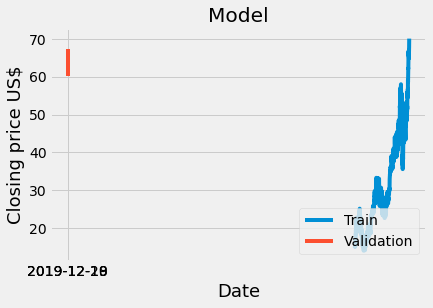

In [114]:
# Plot future predictions (uses last predicted data to predict future rather than actual data)
# TODO: need to figure out why the future values are not plotting correctly


# train = price_data[: training_data_len]
# valid = price_data[training_data_len :]
# valid['Predictions'] = predictions

print(price_data['Close'])
print(future['Close'])
plt.figure(figsize=(20,8))
# plt.figure()
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price US$', fontsize=18)
plt.plot(price_data['Close'])
plt.plot(future['Close'])
# plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [20]:
actual = web.DataReader(stock, data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(actual['Close'])

Date
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, dtype: float64


### My Thoughts:

* Scaling was done on the full dataset before it was split, if I fix this to scale after spliting, then is this detrimental to the model? 
* Can loop through the block with "using last 60 days of data, predict the next value" and keep adding this data to the quote data to predict further out into the future 
 * At what point does this deviate too far?
 * At what point does the model need to be retrained?
* Looks like a more accurate value could be obtained by subtracting the RMSE value, as it is consistenly higher than the actual stock pred_price
* Try with other stock prices as well
* How can I automate this process for many stocks and find the best model?
* How can I automate this and use different sample lengths and find the best model?
* How can I automate this and use Australian stock prices?